## General Statistics on Fight for Sight Publications

This notebooks prints and plots some general stats about the number of Fight for Sight publications and the number of citations they have.

### Import Libraries

In [1]:
import math
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import re

### Load Data

In [2]:
df = pd.read_pickle('data/EPMC/ffs_papers.pkl')
df.set_index('pmid',inplace=True)
df = df[~df.index.isnull()]

df['firstPublicationDate'] = pd.to_datetime(df['firstPublicationDate'])
df['pubYear'] = df['firstPublicationDate'].dt.year.astype(int)

print('In total there are '+str(len(df))+' Fight for Sight papers.')

In total there are 1601 Fight for Sight papers.


### Select Year Range to Investigate

In [3]:
START_YEAR = 1990
END_YEAR = 2020

df = df[(df['pubYear']>=START_YEAR) & (df['pubYear']<=END_YEAR)]

print('Between',START_YEAR,'and',END_YEAR,'there are',len(df),'papers.')

Between 1990 and 2020 there are 1601 papers.


### Number of Publications per Year

In [4]:
# general plotting function
def plot_bar(series,
             figsize=(20,9), dpi=300,
             horizontal=False,stacked=False,
             xlabel='',ylabel='',title='',legend=None,
             color='#77b800',fontsize=20, rot=30):
    
    ax = plt.figure(figsize=figsize).gca()
    
    if horizontal:
        if color is None:
            series.plot.barh(stacked=stacked,rot=rot,fontsize=fontsize,ax=ax)
        else:
            series.plot.barh(stacked=stacked,color=color,rot=rot,fontsize=fontsize,ax=ax)
    else:
        if color is None:
            series.plot.bar(stacked=stacked,rot=rot,fontsize=fontsize,ax=ax)
        else:
            series.plot.bar(stacked=stacked,color=color,rot=rot,fontsize=fontsize,ax=ax)
    
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.title(title,fontsize=fontsize)    
    if legend is not None:
        plt.legend(legend,fontsize=fontsize)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.tight_layout()

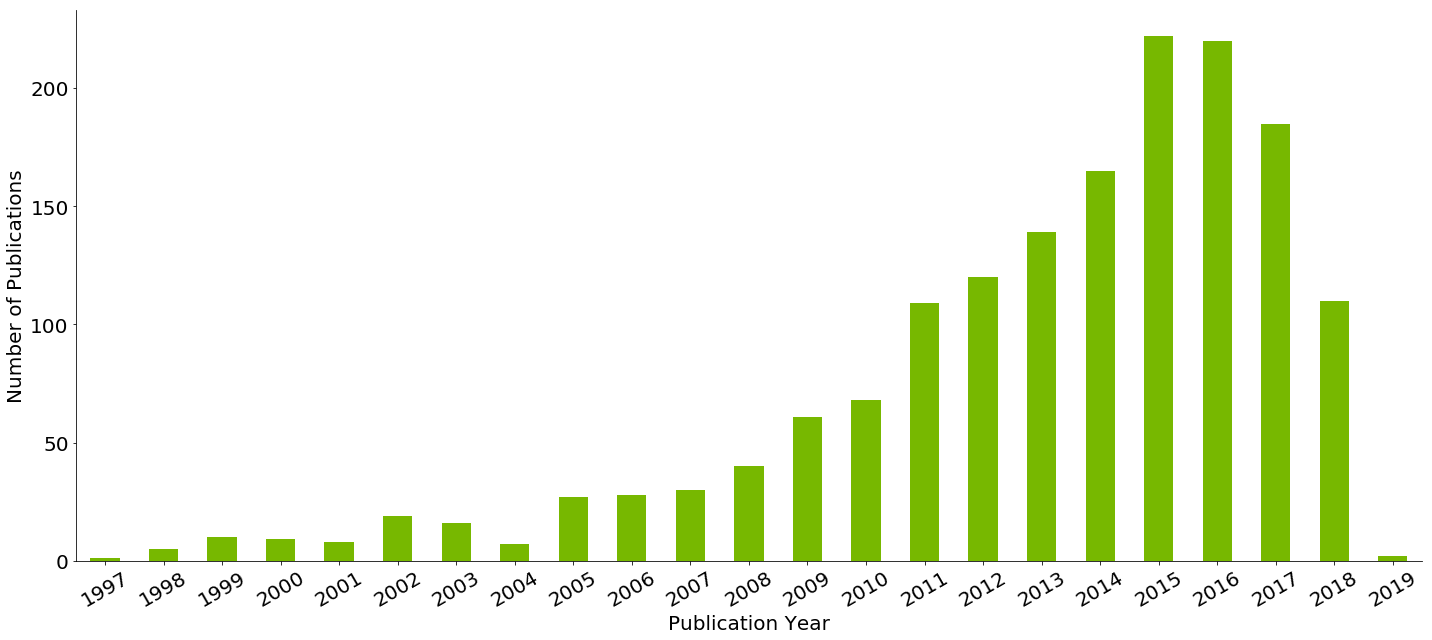

In [5]:
plot_bar(df.groupby('pubYear').pubYear.count(),
         xlabel='Publication Year',ylabel='Number of Publications')

### Most Recent Publications

In [6]:
with pd.option_context('display.max_colwidth', -1):
    display(df[['firstPublicationDate','title']].sort_values(by='firstPublicationDate',ascending=False).head(10))

,firstPublicationDate,title
pmid,,
30634998,2019-01-11,Glucose transporter 1 critically controls microglial activation through facilitating glycolysis.
30616676,2019-01-07,Optic nerve thinning and neurosensory retinal degeneration in the rTg4510 mouse model of frontotemporal dementia.
30526634,2018-12-07,Complex structural variants in Mendelian disorders: identification and breakpoint resolution using short- and long-read genome sequencing.
30534372,2018-12-05,"High-resolution, in vivo multimodal photoacoustic microscopy, optical coherence tomography, and fluorescence microscopy imaging of rabbit retinal neovascularization."
29016458,2018-12-01,QUANTITATIVE ANALYSIS OF HYPERAUTOFLUORESCENT RINGS TO CHARACTERIZE THE NATURAL HISTORY AND PROGRESSION IN RPGR-ASSOCIATED RETINOPATHY.
30513534,2018-12-01,Longitudinal Assessment of Retinal Structure in Achromatopsia Patients With Long-Term Follow-up.
30581282,2018-11-26,Intravitreal bevacizumab upregulates transthyretin in experimental branch retinal vein occlusion.
30468146,2018-11-23,Decision and navigation in mouse parietal cortex.
30473378,2018-11-22,Myofibroblasts in macular fibrosis secondary to neovascular age-related macular degeneration - the potential sources and molecular cues for their recruitment and activation.


### Number of Citations - General Stats

In [7]:
fraction_cited = (df['citedByCount']>0).value_counts(normalize=True)
print('Fraction of Papers with at Least One Citation: {:.0%}.'.format(fraction_cited[True]))
print('Mean Number of Citations: {:.0f}.'.format(df['citedByCount'].mean()))
print('Median Number of Citations: {:.0f}.'.format(df['citedByCount'].median()))
print('Maximum Number of Citations: {:.0f}.'.format(df['citedByCount'].max()))

Fraction of Papers with at Least One Citation: 91%.
Mean Number of Citations: 23.
Median Number of Citations: 9.
Maximum Number of Citations: 3337.


### Papers with Most Citations

In [8]:
with pd.option_context('display.max_colwidth', -1):
    # top 10 papers with most citations
    display(df[['citedByCount','title']].sort_values(by='citedByCount',ascending=False).head(10))

,citedByCount,title
pmid,,
23245609,3337,"A comparative risk assessment of burden of disease and injury attributable to 67 risk factors and risk factor clusters in 21 regions, 1990-2010: a systematic analysis for the Global Burden of Disease Study 2010."
17051153,310,Corneal avascularity is due to soluble VEGF receptor-1.
22108672,309,Normalization as a canonical neural computation.
15558062,289,Light-activated ion channels for remote control of neuronal firing.
24217912,284,The Human Phenotype Ontology project: linking molecular biology and disease through phenotype data.
16452172,265,Drusen complement components C3a and C5a promote choroidal neovascularization.
12727870,248,A conserved ER targeting motif in three families of lipid binding proteins and in Opi1p binds VAP.
24439297,242,Retinal gene therapy in patients with choroideremia: initial findings from a phase 1/2 clinical trial.
19146811,230,Local origin of field potentials in visual cortex.


### Citation Groups

In [9]:
CITATION_GROUPS = [0.5, 3.5, 7.5, 17.5]

CITATION_LABELS=[]
for i in range(len(CITATION_GROUPS)+1):
    if i==0:
        start = 0
    else:
        start = math.ceil(CITATION_GROUPS[i-1])
        
    if i<len(CITATION_GROUPS):
        end = math.floor(CITATION_GROUPS[i])
    
    if start==end:
        CITATION_LABELS.append(str(start))    
    elif i==len(CITATION_GROUPS):
        CITATION_LABELS.append('More than '+str(math.floor(CITATION_GROUPS[i-1])))
    else:
        CITATION_LABELS.append(str(start) + ' to ' + str(end))
    
CITATION_GROUPS = [-0.5] + CITATION_GROUPS + [9999999]

print('The defined citation groups are:')
print(CITATION_LABELS)

The defined citation groups are:
['0', '1 to 3', '4 to 7', '8 to 17', 'More than 17']


### Publications Grouped by Number of Citations

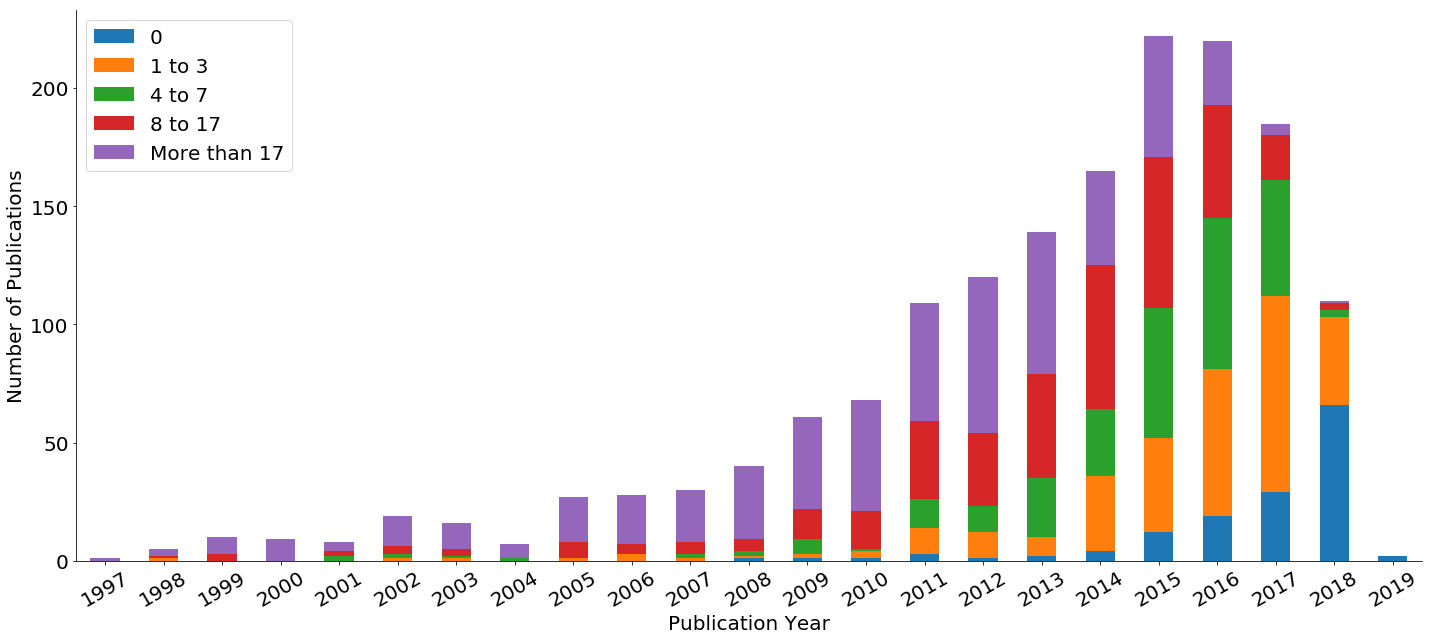

In [10]:
cited_bins = pd.cut(df['citedByCount'],CITATION_GROUPS, 
                    labels=CITATION_LABELS)

to_plot = cited_bins.groupby(df['pubYear']).value_counts(sort=False).unstack(fill_value=0)

plot_bar(to_plot,
         xlabel='Publication Year',ylabel='Number of Publications', 
         legend=CITATION_LABELS,
         color=None,stacked=True)

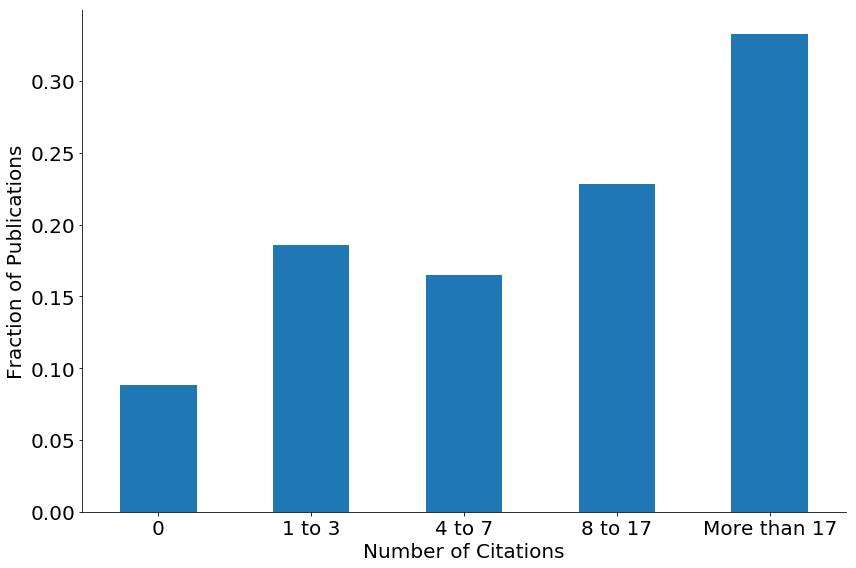

In [11]:
plot_bar(cited_bins.value_counts(normalize=True,sort=False),
              figsize=(12,8),
              xlabel='Number of Citations',ylabel='Fraction of Publications',
              color=None, rot=0)

### By Grant Number

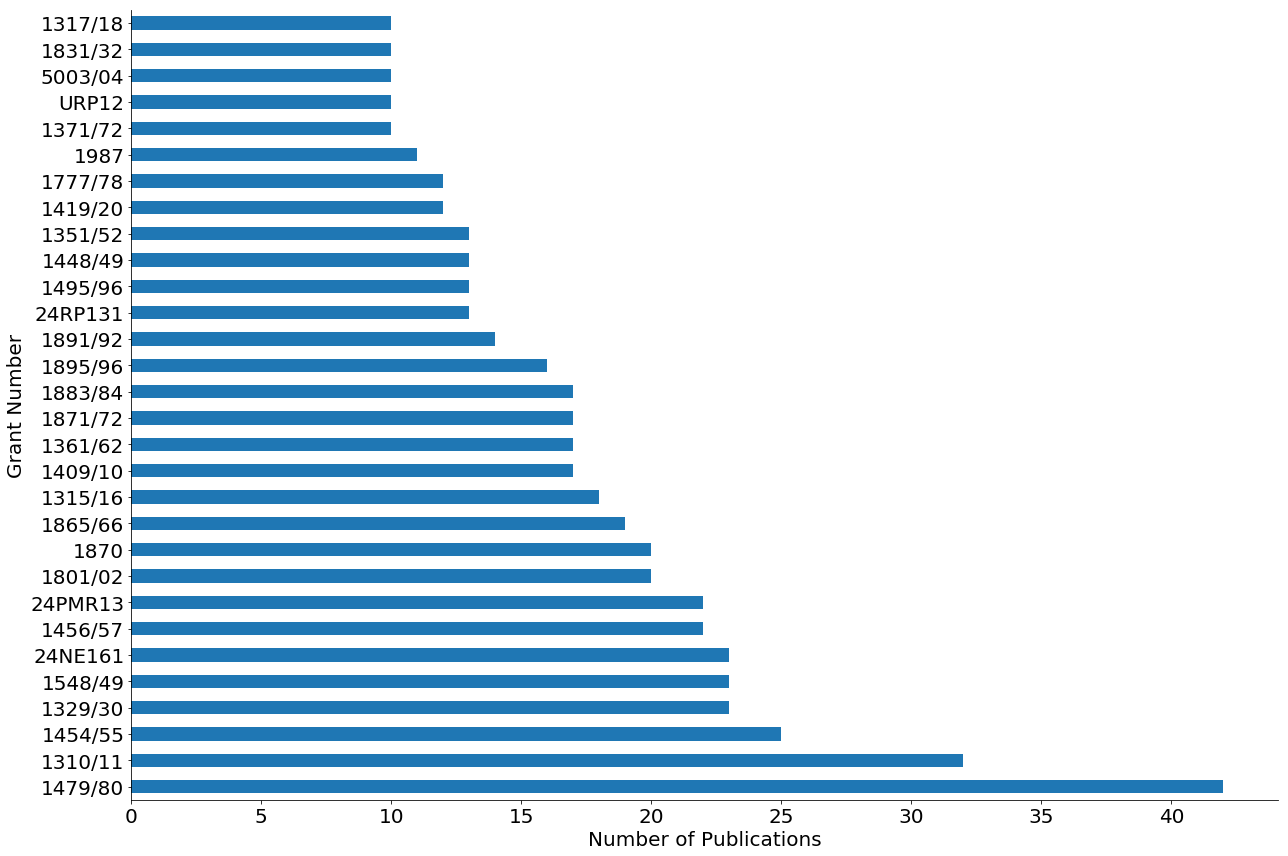

In [12]:
def get_ffs_grant_ids(grantsList):
    '''Extract FFS grant IDs from grants list dicts.'''
    if type(grantsList) is list:
        ids = [grant['grantId'] for grant in grantsList 
               if 'Fight for Sight' in grant['agency'] 
               and 'grantId' in grant.keys()]
        
        if len(ids)==0:
            ids = np.nan
    else:
        ids = np.nan
    
    return ids

df['FFS_IDs'] = df['grantsList'].apply(get_ffs_grant_ids)
grant_counts = pd.Series([grant for grant_list in df['FFS_IDs'].dropna() for grant in grant_list])
grant_counts = grant_counts.value_counts()

plot_bar(grant_counts.head(30),
         figsize=(18,12), horizontal=True,
         xlabel='Number of Publications',ylabel='Grant Number',
         color=None, rot=0)

### By Funding Agency

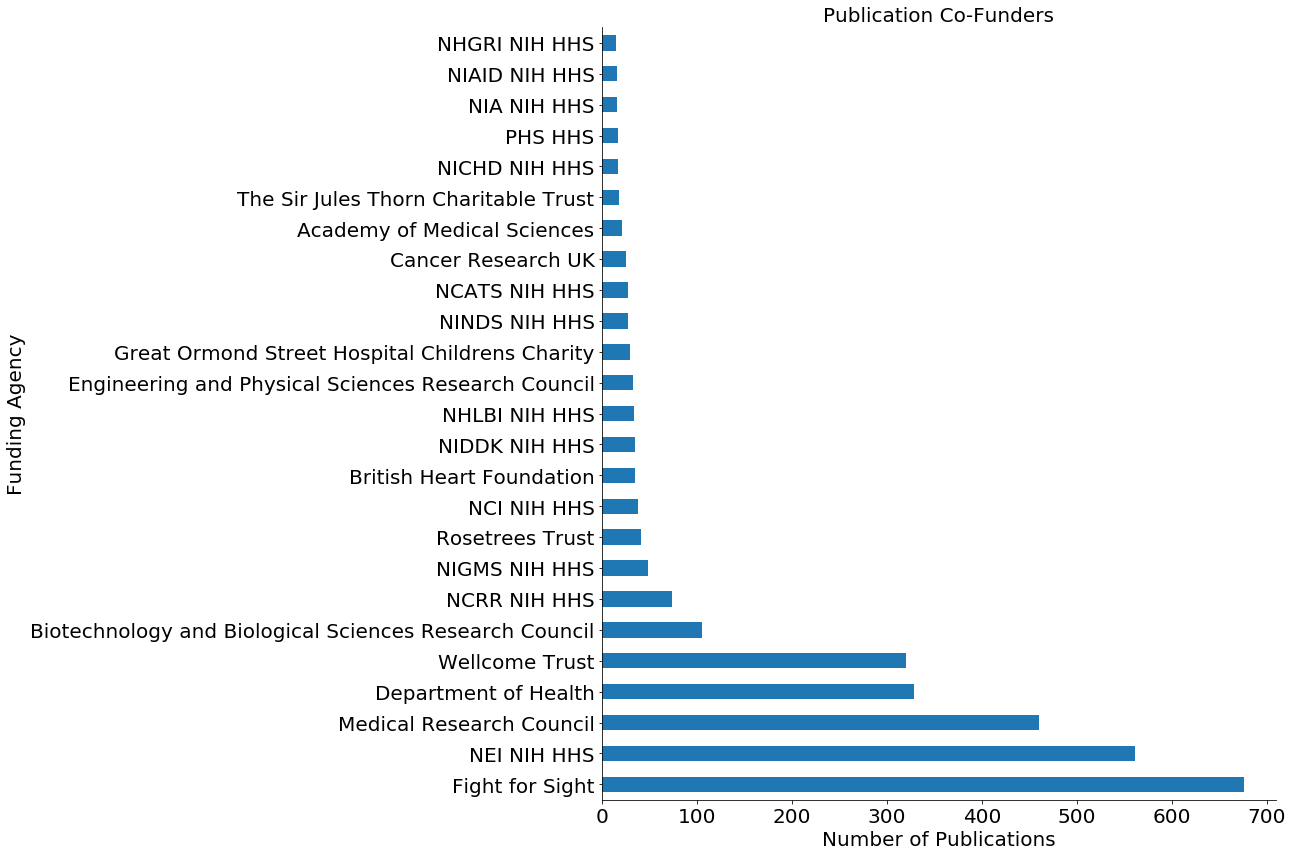

In [13]:
def get_grant_agencies(grantsList):
    '''Extract gramt agencies from grants list dicts.'''
    if type(grantsList) is list:
        agencies = [grant['agency'] for grant in grantsList]
        agencies = list(set(agencies))        
        if len(agencies)==0:
            agencies = np.nan
    else:
        agencies = np.nan
    return agencies

df['funding_agencies'] = df['grantsList'].apply(get_grant_agencies)

agency_counts = pd.Series([grant for grant_list in df['funding_agencies'].dropna() for grant in grant_list])
agency_counts = agency_counts.value_counts()

plot_bar(agency_counts.head(25),
         figsize=(18,12), horizontal=True,
         xlabel='Number of Publications',ylabel='Funding Agency',
         title='Publication Co-Funders',
         color=None, rot=0)